### Diplodatos 02 - Análisis Exploratorio y Curación

#### Práctico 01 - Tablas de crecimiento
santiago.asa@gmail.com  

Utilizar un dataset de tablas de peso típicas para cada edad. 
* Graficar las curvas correspondientes a cada percentil para niños y niñas.  
* Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico.


Nota:  
*En la columna Sex, "1" representa a niños y "2" a niñas.*   

Dataset description:

> National Center for Health Statistics  
Data used to produce the United States Growth Charts smoothed percentile curves are contained in 8 Excel data files representing the 8 different growth curves for infants (weight-for-age; length-for-age, weight-for-recumbent length; head circumference-for-age) and older children (weight-for-stature; weight-for-age; stature-for-age; and BMI-for-age). These data remain unchanged from the initial release on May 30, 2000 of the growth charts.  
Weight-for-age charts, birth to 36 months, LMS parameters and selected smoothed weight percentiles in kilograms, by sex and age.  
**The LMS parameters are the median (M), the generalized coefficient of variation (S), and the power in the Box-Cox transformation (L).**

Source:  
https://www.cdc.gov/growthcharts/percentile_data_files.htm  

#### Ejecución  
El archivo wtageinf.csv debe estar ubicado en la misma carpeta que esta notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pathlib
path=str(pathlib.Path().absolute())

In [3]:
df=pd.read_csv(path+'/wtageinf.csv')
df.head()

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878


¿Existen valores faltantes?

In [4]:
df.isnull().values.any()

False

In [5]:
print('Esta tabla incluye registros de personas de hasta ' + str(df.Agemos.max())+' meses de vida')
print('El peso máximo, para ' + str(df.Agemos.max())+' meses, es de ' + str(df.P97.max()) + 'kg')

Esta tabla incluye registros de personas de hasta 36.0 meses de vida
El peso máximo, para 36.0 meses, es de 17.93624653kg


In [6]:
data_boys=df[df['Sex']==1].loc[:,'P3':'P97']
data_girls=df[df['Sex']==2].loc[:,'P3':'P97']

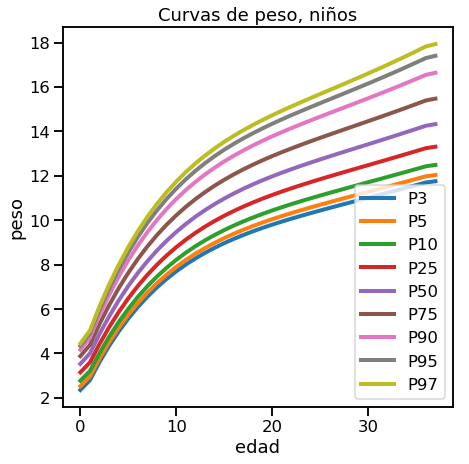

In [7]:
plt.figure(figsize=(7,7))
sns.set_context('talk', rc={"lines.linewidth": 4})
ax=sns.lineplot(data=data_boys, dashes=False)
ax.set(xlabel='edad', ylabel='peso', title='Curvas de peso, niños')
plt.show(ax)

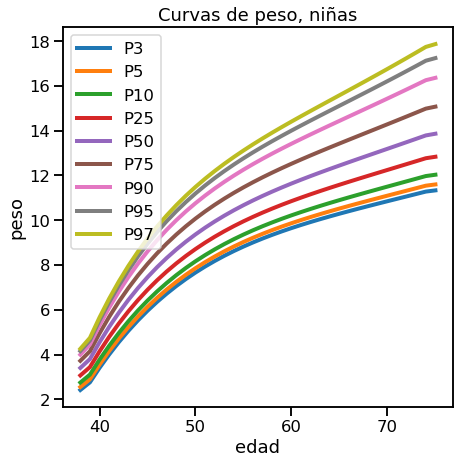

In [8]:
plt.figure(figsize=(7,7))
sns.set_context('talk', rc={"lines.linewidth": 4})
ax=sns.lineplot(data=data_girls, dashes=False)
ax.set(xlabel='edad', ylabel='peso', title='Curvas de peso, niñas')
plt.show(ax)